# TSAI Assignment 11

Import Headers

In [1]:
from __future__ import print_function
from utils import torch,nn,F,optim,datasets,transforms
import utils
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Get train and test transforms - use utils module for CIFAR

In [2]:
means = [0.4914, 0.4822, 0.4465]
stds = [0.2470, 0.2435, 0.2616]
train_transforms = utils.getTrainTransformWithCutoutForCIFAR(means,stds)
test_transforms =  utils.getTestTransformsForCIFAR(means,stds)


Get the CIFAR 10 data - train dataset and test dataset

In [3]:
train = utils.getDataWithAlbumentations('./data', True,True, train_transforms)
test = utils.getDataWithAlbumentations('./data', False,True,test_transforms)

Files already downloaded and verified
Files already downloaded and verified


Get the train_loader and test_loader -  batches of data used in model training/testing

In [4]:
SEED = 1
# dataloader arguments 
shuffle=True
batch_size=512
num_workers=0
pin_memory=True

# train dataloader
train_loader = utils.getDataLoader(SEED, shuffle, batch_size, num_workers, pin_memory, train)

# test dataloader
test_loader = utils.getDataLoader(SEED, shuffle, batch_size, num_workers, pin_memory,test)

Print the train dataset after transforms

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


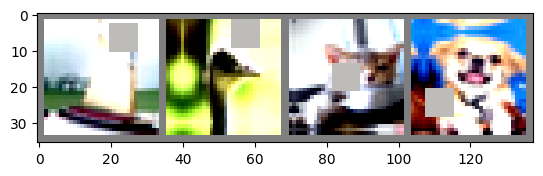

ship  bird  cat   dog  


In [5]:
utils.plotImageCIFAR10(train_loader)

Get the custom resnet model

In [6]:
from models import resnet
myResnetModel = resnet.ResNet18().to(utils.getDevice())

Print Model Summary

In [7]:
utils.printModelSummary(myResnetModel,(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

Use LR Finder to get Max LR 

C:\Users\SToleti\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch_lr_finder\lr_finder.py:5: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
 67%|█████████████████████████████████████████████████████▌                          | 134/200 [01:57<00:57,  1.14it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 4.51E-02


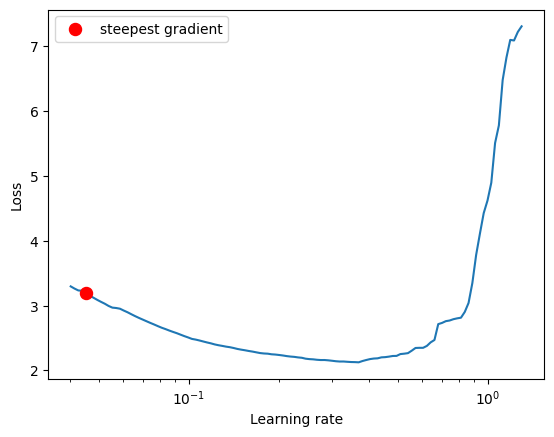

In [8]:
optimizer = optim.Adam(myResnetModel.parameters(), lr=0.03, weight_decay=1e-4)
criterion = nn.CrossEntropyLoss()
utils.suggestMaxLR(myResnetModel, optimizer, criterion, train_loader)

Model Training

In [14]:
from torch.optim.lr_scheduler import OneCycleLR

# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

num_epochs = 20

scheduler = OneCycleLR(
        optimizer,
        max_lr= 4.51E-02, #6.41E-02,
        steps_per_epoch=len(train_loader),
        epochs=num_epochs,
        pct_start=5/num_epochs,
        div_factor=80,
        three_phase=False,
        final_div_factor=550,
        anneal_strategy='linear'
    )

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  tr_Acc, tr_loss = utils.train(myResnetModel, train_loader, optimizer, criterion, scheduler)
  tst_acc, tst_loss = utils.test(myResnetModel, test_loader, criterion)
  train_acc.append(tr_Acc)
  train_losses.append(tr_loss)
  test_acc.append(tst_acc)
  test_losses.append(tst_loss)
  print(f'LR = {scheduler.get_last_lr()}')
  #scheduler.step()
  #scheduler.step()

Epoch 1


Train: Loss=1.4325 Batch_id=97 Accuracy=39.99: 100%|███████████████████████████████████| 98/98 [01:25<00:00,  1.14it/s]


Test set: Average loss: 0.0051, Accuracy: 2983/10000 (29.83%)

LR = [0.009489215235173824]
Epoch 2


Train: Loss=1.2697 Batch_id=97 Accuracy=53.39: 100%|███████████████████████████████████| 98/98 [01:28<00:00,  1.10it/s]


Test set: Average loss: 0.0026, Accuracy: 5207/10000 (52.07%)

LR = [0.018414680470347645]
Epoch 3


Train: Loss=1.2036 Batch_id=97 Accuracy=60.40: 100%|███████████████████████████████████| 98/98 [01:33<00:00,  1.05it/s]


Test set: Average loss: 0.0024, Accuracy: 5878/10000 (58.78%)

LR = [0.02734014570552147]
Epoch 4


Train: Loss=1.0649 Batch_id=97 Accuracy=63.56: 100%|███████████████████████████████████| 98/98 [01:31<00:00,  1.07it/s]


Test set: Average loss: 0.0023, Accuracy: 6168/10000 (61.68%)

LR = [0.036265610940695296]
Epoch 5


Train: Loss=0.9004 Batch_id=97 Accuracy=64.91: 100%|███████████████████████████████████| 98/98 [01:26<00:00,  1.13it/s]


Test set: Average loss: 0.0026, Accuracy: 5773/10000 (57.73%)

LR = [0.04506932042517007]
Epoch 6


Train: Loss=1.0603 Batch_id=97 Accuracy=66.11: 100%|███████████████████████████████████| 98/98 [01:25<00:00,  1.14it/s]


Test set: Average loss: 0.0035, Accuracy: 5445/10000 (54.45%)

LR = [0.042062722091836736]
Epoch 7


Train: Loss=0.9326 Batch_id=97 Accuracy=67.81: 100%|███████████████████████████████████| 98/98 [01:25<00:00,  1.15it/s]


Test set: Average loss: 0.0026, Accuracy: 5742/10000 (57.42%)

LR = [0.039056123758503404]
Epoch 8


Train: Loss=0.7684 Batch_id=97 Accuracy=69.34: 100%|███████████████████████████████████| 98/98 [01:24<00:00,  1.16it/s]


Test set: Average loss: 0.0020, Accuracy: 6535/10000 (65.35%)

LR = [0.03604952542517007]
Epoch 9


Train: Loss=0.8822 Batch_id=97 Accuracy=70.60: 100%|███████████████████████████████████| 98/98 [01:25<00:00,  1.14it/s]


Test set: Average loss: 0.0021, Accuracy: 6736/10000 (67.36%)

LR = [0.03304292709183673]
Epoch 10


Train: Loss=0.8398 Batch_id=97 Accuracy=71.68: 100%|███████████████████████████████████| 98/98 [01:26<00:00,  1.13it/s]


Test set: Average loss: 0.0019, Accuracy: 6902/10000 (69.02%)

LR = [0.0300363287585034]
Epoch 11


Train: Loss=0.9197 Batch_id=97 Accuracy=73.02: 100%|███████████████████████████████████| 98/98 [01:25<00:00,  1.14it/s]


Test set: Average loss: 0.0018, Accuracy: 6895/10000 (68.95%)

LR = [0.027029730425170068]
Epoch 12


Train: Loss=0.7918 Batch_id=97 Accuracy=73.77: 100%|███████████████████████████████████| 98/98 [01:27<00:00,  1.12it/s]


Test set: Average loss: 0.0020, Accuracy: 6702/10000 (67.02%)

LR = [0.024023132091836735]
Epoch 13


Train: Loss=0.7107 Batch_id=97 Accuracy=75.23: 100%|███████████████████████████████████| 98/98 [01:26<00:00,  1.13it/s]


Test set: Average loss: 0.0018, Accuracy: 6863/10000 (68.63%)

LR = [0.0210165337585034]
Epoch 14


Train: Loss=0.6454 Batch_id=97 Accuracy=76.30: 100%|███████████████████████████████████| 98/98 [01:28<00:00,  1.11it/s]


Test set: Average loss: 0.0019, Accuracy: 6887/10000 (68.87%)

LR = [0.018009935425170067]
Epoch 15


Train: Loss=0.6229 Batch_id=97 Accuracy=77.96: 100%|███████████████████████████████████| 98/98 [01:27<00:00,  1.12it/s]


Test set: Average loss: 0.0017, Accuracy: 7202/10000 (72.02%)

LR = [0.015003337091836735]
Epoch 16


Train: Loss=0.5868 Batch_id=97 Accuracy=79.12: 100%|███████████████████████████████████| 98/98 [01:26<00:00,  1.14it/s]


Test set: Average loss: 0.0015, Accuracy: 7514/10000 (75.14%)

LR = [0.011996738758503406]
Epoch 17


Train: Loss=0.5547 Batch_id=97 Accuracy=80.32: 100%|███████████████████████████████████| 98/98 [01:25<00:00,  1.14it/s]


Test set: Average loss: 0.0011, Accuracy: 8169/10000 (81.69%)

LR = [0.008990140425170073]
Epoch 18


Train: Loss=0.4697 Batch_id=97 Accuracy=82.39: 100%|███████████████████████████████████| 98/98 [01:25<00:00,  1.15it/s]


Test set: Average loss: 0.0010, Accuracy: 8301/10000 (83.01%)

LR = [0.005983542091836741]
Epoch 19


Train: Loss=0.4469 Batch_id=97 Accuracy=84.37: 100%|███████████████████████████████████| 98/98 [01:25<00:00,  1.14it/s]


Test set: Average loss: 0.0008, Accuracy: 8609/10000 (86.09%)

LR = [0.0029769437585034086]
Epoch 20


Train: Loss=0.3409 Batch_id=97 Accuracy=86.35: 100%|███████████████████████████████████| 98/98 [01:25<00:00,  1.14it/s]


Test set: Average loss: 0.0007, Accuracy: 8809/10000 (88.09%)

LR = [-2.965457482993067e-05]


Plot Model Test and Train accuracy

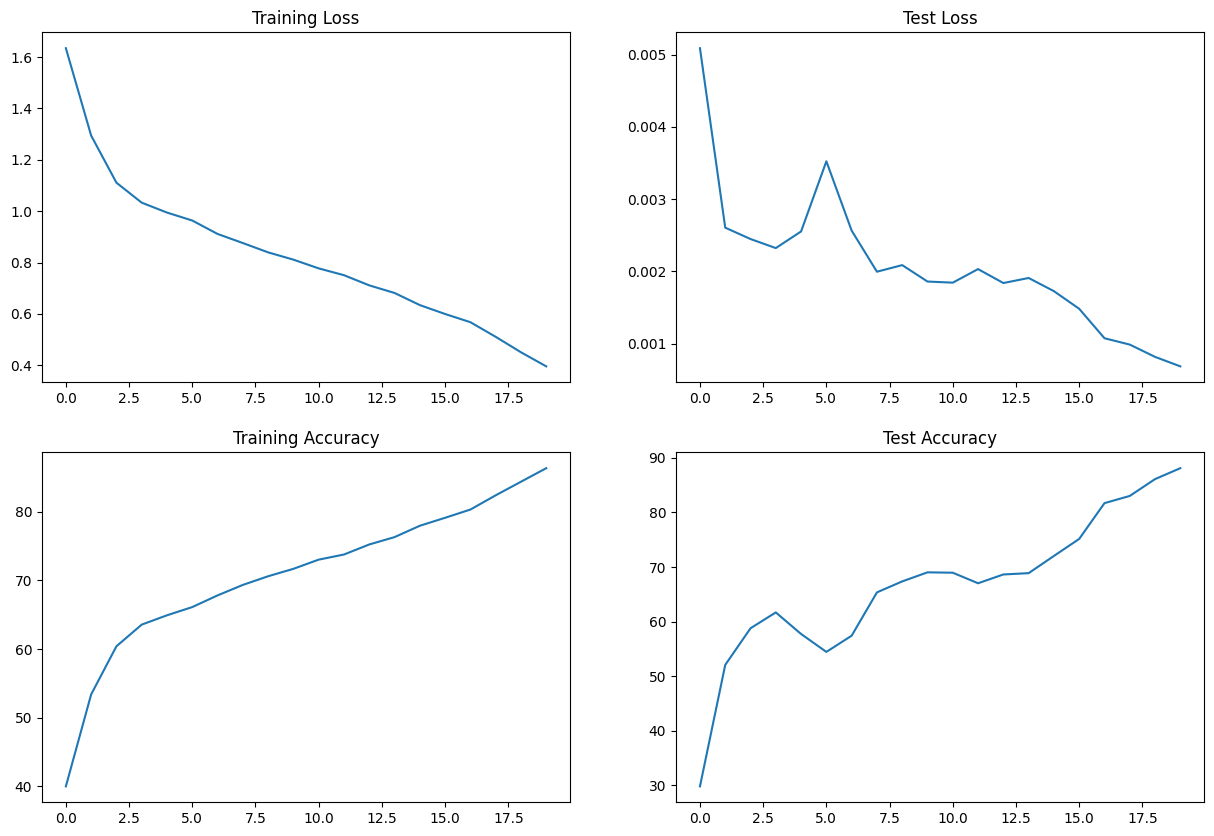

In [15]:
utils.printModelTrainTestAccuracy(train_acc, train_losses, test_acc, test_losses)

Get misclassified images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


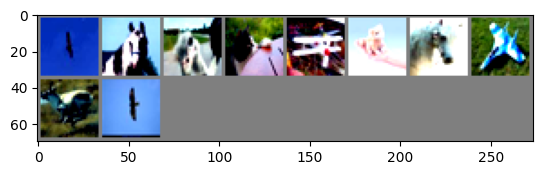

Actual labels:  
bird   horse  bird   cat    plane  cat    horse  plane  deer   bird 
Predicted labels:  
plane  dog    horse  plane  ship   ship   dog    bird   bird   plane


In [20]:
import torchvision
misclassfied_images, misclassfied_labels,actual_labels = utils.getMiscassifications(myResnetModel, test_loader, 10)
utils.imshow(torchvision.utils.make_grid(misclassfied_images.to('cpu')))
print('Actual labels:  ')
print('  '.join(f'{actual_labels[j]:5s}' for j in range(10)))
print('Predicted labels:  ')
print('  '.join(f'{misclassfied_labels[j]:5s}' for j in range(10)))

Show Gradcam image for misclassified data

C:\Users\SToleti\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\module.py:1344: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
C:\Users\SToleti\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\functional.py:3737: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


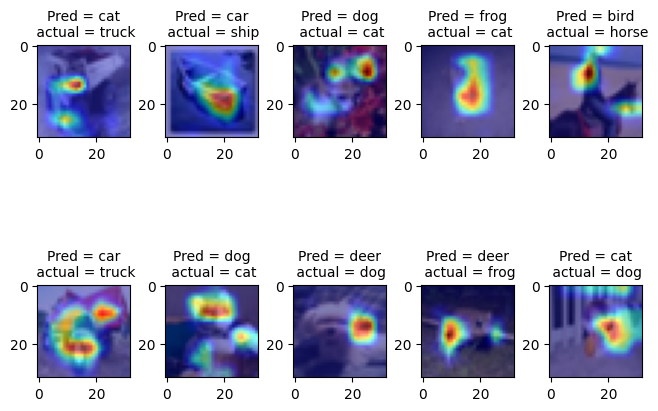

In [16]:
utils.displayGradCamForInvalidData(myResnetModel, test_loader,means, stds, 10)